<a href="https://colab.research.google.com/github/NoCodeProgram/deepLearning/blob/main/nn/batch_norm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/NoCodeProgram/deepLearning.git


Cloning into 'deepLearning'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 80 (delta 19), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (80/80), 2.73 MiB | 6.64 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [2]:
import torch
import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv('./deepLearning/nn/classify_3c_5k.csv')
print(df.head())
# Convert the DataFrame to a numpy array
data = df[['x', 'y']].values
labels = df['label'].values

# Print the shapes of the data and labels
print(f'Data shape: {data.shape}')
print(f'Labels shape: {labels.shape}')



          x         y  label
0  0.097627  0.430379      1
1  0.205527  0.089766      2
2 -0.152690  0.291788      1
3 -0.124826  0.783546      0
4  0.927326 -0.233117      0
Data shape: (5000, 2)
Labels shape: (5000,)


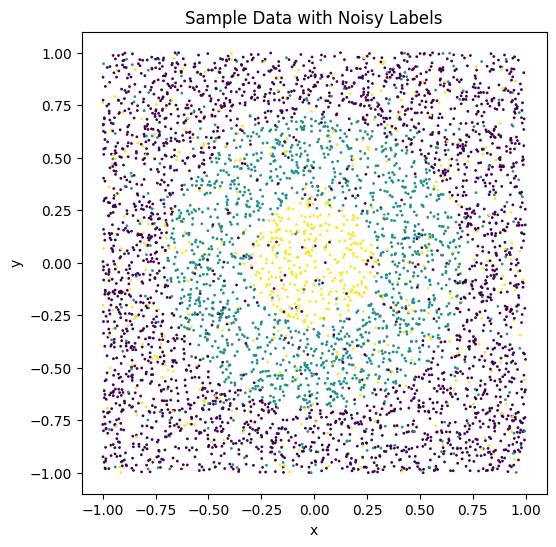

In [3]:
import matplotlib.pyplot as plt

# Plot the points
plt.figure(figsize=(6, 6))
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis', s=1)
plt.title('Sample Data with Noisy Labels')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [4]:
# Convert the numpy arrays to PyTorch tensors
data_torch = torch.tensor(data, dtype=torch.float32)
labels_torch = torch.tensor(labels, dtype=torch.long)

data_length = len(data_torch)
split_length = int(0.8*data_length)

train_data = data_torch[:split_length]
train_labels = labels_torch[:split_length]
val_data = data_torch[split_length:]
val_labels = labels_torch[split_length:]

print(train_data.shape, train_labels.shape, train_labels.dtype)


torch.Size([4000, 2]) torch.Size([4000]) torch.int64


In [5]:
g = torch.Generator().manual_seed(42)

def get_batch(data, labels, batch_size=256):
    # Generate random indices
    indices = torch.randint(0, len(data), size=(batch_size,), generator= g)

    # Select the data and labels at these indices
    data_batch = data[indices]
    labels_batch = labels[indices]

    return data_batch, labels_batch

data_batch, labels_batch = get_batch(train_data,train_labels)
print(data_batch.shape, labels_batch.shape)

torch.Size([256, 2]) torch.Size([256])


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim


input_size = 2
hidden_size = 4
output_size = 3

torch.manual_seed(42)
g.manual_seed(42)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)

net = Net()
val_losses = []

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for steps in range(20000):
    net.train()
    data_batch, labels_batch = get_batch(data_torch, labels_torch, batch_size=256)
    output = net(data_batch)

    loss = loss_fn(output, labels_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if steps % 1000 == 0:
        net.eval()
        output = net(val_data)
        val_loss = loss_fn(output, val_labels)
        print(f"{steps} val_loss: {val_loss.item()}")
        val_losses.append(val_loss.item())

0 val_loss: 1.0303899049758911
1000 val_loss: 0.9683362245559692
2000 val_loss: 0.968747615814209
3000 val_loss: 0.9688981771469116
4000 val_loss: 0.9690449833869934
5000 val_loss: 0.9684929847717285
6000 val_loss: 0.9687278270721436
7000 val_loss: 0.9688007831573486
8000 val_loss: 0.9690492749214172
9000 val_loss: 0.9688099026679993
10000 val_loss: 0.9686919450759888
11000 val_loss: 0.9688398241996765
12000 val_loss: 0.9687496423721313
13000 val_loss: 0.9688925743103027
14000 val_loss: 0.9686795473098755
15000 val_loss: 0.9688741564750671
16000 val_loss: 0.9687931537628174
17000 val_loss: 0.9686613082885742
18000 val_loss: 0.9689306020736694
19000 val_loss: 0.9690144658088684


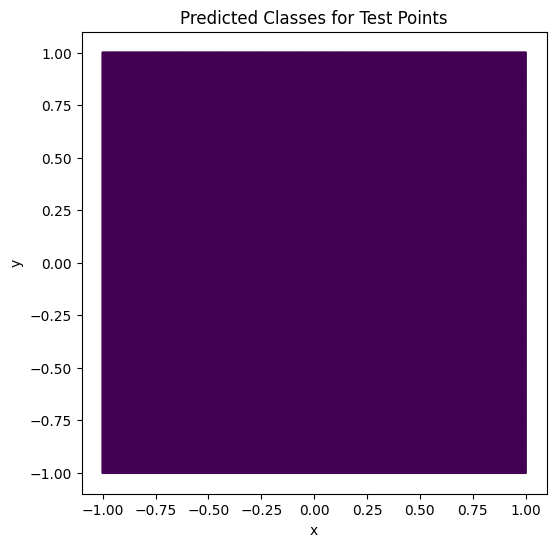

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of points along each dimension (x and y)
n_points = 300

# Create a grid of uniformly spaced points over [-1, 1] in both x and y dimensions
x_points = np.linspace(-1, 1, n_points)
y_points = np.linspace(-1, 1, n_points)
x_grid, y_grid = np.meshgrid(x_points, y_points)
points_test = np.vstack((x_grid.flatten(), y_grid.flatten())).T

# Convert the points to a PyTorch tensor
points_test_torch = torch.from_numpy(points_test).float()

net.eval()
output_test = net(points_test_torch)
pred = torch.argmax(output_test,dim=1).numpy()

# Plot the points, colored by their predicted class
plt.figure(figsize=(6, 6))
plt.scatter(points_test[:, 0], points_test[:, 1], c=pred, cmap='viridis', s=1)
plt.title('Predicted Classes for Test Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim


input_size = 2
hidden_size = 4
output_size = 3

torch.manual_seed(42)
g.manual_seed(42)

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq_model = nn.Sequential(
            nn.Linear(input_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size, bias=False),
            nn.BatchNorm1d(num_features=hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_model(x)

net = Net()
b_val_losses = []
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for steps in range(20000):
    net.train()
    data_batch, labels_batch = get_batch(data_torch, labels_torch, batch_size=256)
    output = net(data_batch)

    loss = loss_fn(output, labels_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if steps % 1000 == 0:
        net.eval()
        output = net(val_data)
        val_loss = loss_fn(output, val_labels)
        print(f"{steps} val_loss: {val_loss.item()}")
        b_val_losses.append(val_loss.item())

0 val_loss: 1.0507676601409912
1000 val_loss: 0.7276599407196045
2000 val_loss: 0.692394495010376
3000 val_loss: 0.6579619646072388
4000 val_loss: 0.6567022800445557
5000 val_loss: 0.6010939478874207
6000 val_loss: 0.6008585691452026
7000 val_loss: 0.5858089923858643
8000 val_loss: 0.590959370136261
9000 val_loss: 0.5884734392166138
10000 val_loss: 0.5972790718078613
11000 val_loss: 0.5844029784202576
12000 val_loss: 0.5703589916229248
13000 val_loss: 0.5669865012168884
14000 val_loss: 0.57613605260849
15000 val_loss: 0.56657475233078
16000 val_loss: 0.5686517357826233
17000 val_loss: 0.5685952305793762
18000 val_loss: 0.5716021656990051
19000 val_loss: 0.5619430541992188


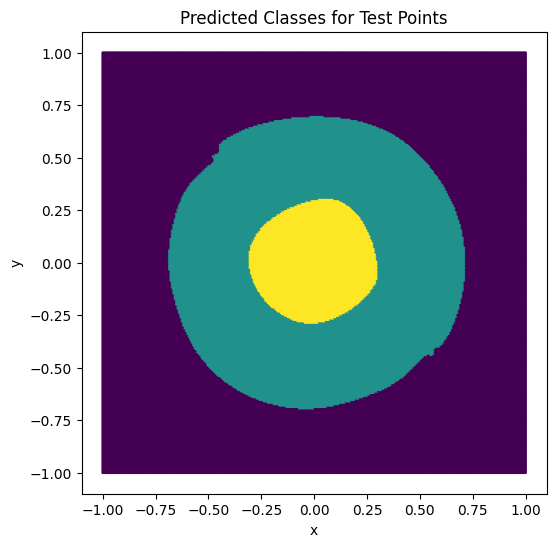

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of points along each dimension (x and y)
n_points = 300

# Create a grid of uniformly spaced points over [-1, 1] in both x and y dimensions
x_points = np.linspace(-1, 1, n_points)
y_points = np.linspace(-1, 1, n_points)
x_grid, y_grid = np.meshgrid(x_points, y_points)
points_test = np.vstack((x_grid.flatten(), y_grid.flatten())).T

# Convert the points to a PyTorch tensor
points_test_torch = torch.from_numpy(points_test).float()

net.eval()
output_test = net(points_test_torch)
pred = torch.argmax(output_test,dim=1).numpy()

# Plot the points, colored by their predicted class
plt.figure(figsize=(6, 6))
plt.scatter(points_test[:, 0], points_test[:, 1], c=pred, cmap='viridis', s=1)
plt.title('Predicted Classes for Test Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


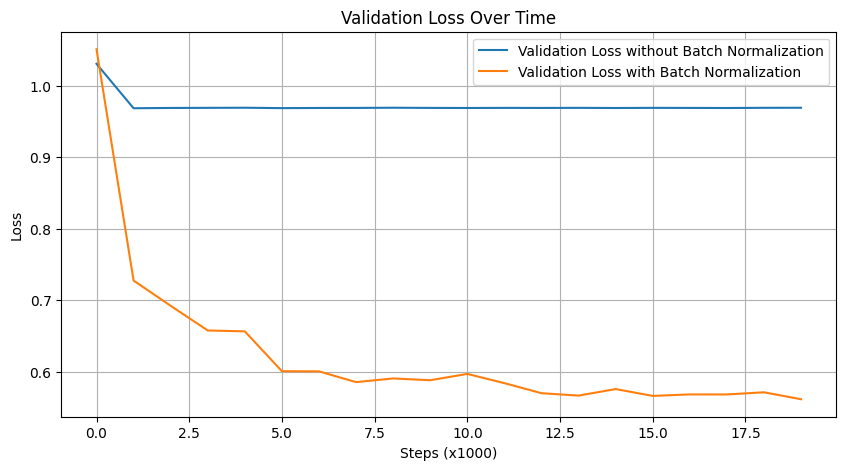

In [11]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
plt.plot(val_losses, label='Validation Loss without Batch Normalization')
plt.plot(b_val_losses, label='Validation Loss with Batch Normalization')
plt.title('Validation Loss Over Time')
plt.xlabel('Steps (x1000)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
